In [1]:
from turtle import distance
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import linalg

from scipy.spatial.distance import directed_hausdorff
%matplotlib inline

# Create distance map

In [155]:
distance_map = cv.imread("../data/map/carla_map_scaled.png")
distance_map = distance_map/255

for i in range(6):
    distance_map = cv.GaussianBlur(distance_map,(5,5),2)
to_one = 1/distance_map.max()
distance_map = distance_map * to_one

cv.imwrite("../data/map/carla_distance_map_scaled.png", distance_map,cv.U)



1.0


True

[0 0 0]


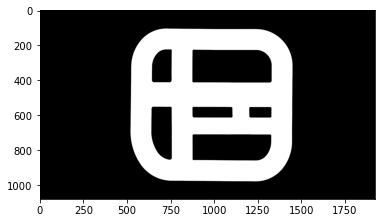

In [13]:
map_reference = cv.imread("../data/map/carla_map_reference_unscaled.png")
rows, cols,_ = map_reference.shape
window_name = 'image'

plt.imshow(map_reference)
#map_reference [0:20, 0:20] = (0,0,255)
#cv.imshow(window_name, map_reference)
#cv.waitKey(0) 
#cv.destroyAllWindows() 
print(map_reference[0,0])

In [15]:
image_points = np.full((4,2), 0)
# in bgr notation
center = (0,255,255)
x_base = (0,0, 255)
negative_y_base = (0,255,0)
diagonal = (255,0,0)

for y in range(rows): 
    for x in range(cols): 
        if (np.array_equal(map_reference[y,x], center)): 
            print("Center: ", map_reference[y,x])
            image_points[0] = np.array([x,y])
        elif (np.array_equal(map_reference[y,x], x_base)): 
            print("X Base: ", map_reference[y,x])
            image_points[1] = np.array([x,y])
        elif (np.array_equal(map_reference[y,x], negative_y_base)): 
            print("- Y Base: ", map_reference[y,x])
            image_points[2] = np.array([x,y])
        elif (np.array_equal(map_reference[y,x], diagonal)): 
            print("Diagonal: ", map_reference[y,x])
            image_points[3] = np.array([x,y])


Center:  [  0 255 255]
X Base:  [  0   0 255]
- Y Base:  [  0 255   0]
Diagonal:  [255   0   0]


In [31]:
world_points

array([[  0,   0],
       [100,   0],
       [  0, 100],
       [100, 100]])

In [84]:
world_points = np.array([
    [0, 0],
    [100, 0],
    [0, 100],
    [100, 100]
])
# invert y axis
world_points[:,1] = -world_points[:,1]

In [85]:
world_points

array([[   0,    0],
       [ 100,    0],
       [   0, -100],
       [ 100, -100]])

In [105]:
image_points_own = np.array([
    [ 963,  373],
    [1369,  373],
    [ 963,  779],
    [1369,  779]
])

In [106]:
for w in world_points:
    print(T(w)) 

[963. 373.]
[1369.  373.]
[963. 779.]
[1369.  779.]


In [101]:
zero_to_100_x_world = (world_points[1]-world_points[0])[0] 
zero_to_100_x_img = (image_points[1]-image_points[0])[0] 

zero_to_100_y_world = (world_points[2]-world_points[1])[1] 
zero_to_100_y_img = (image_points[2]-image_points[1])[1] 

In [102]:
print(zero_to_100_y_world, zero_to_100_y_img)

-100 406


In [103]:
100 * 4.066

406.59999999999997

In [111]:
many_world_points = pd.read_csv("../data/overall__imu__data.csv")


In [112]:
wps = np.stack([many_world_points['positions_x_ground_truth'], many_world_points['positions_y_ground_truth']],axis=1)

In [113]:
ips = []
for wp in wps: 
    ips.append(T(wp))

ips = np.array(ips)

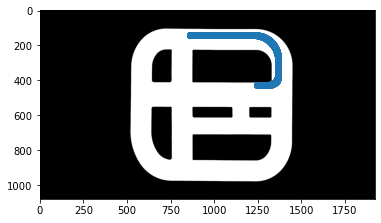

In [115]:
plt.imshow(map_reference)
plt.scatter(ips[:,0], ips[:,1])


In [112]:
ig_transposed = np.transpose(image_points[1:3])
wp_transposed = np.transpose(world_points[1:3])

In [113]:
linalg.inv(wp_transposed)

array([[ 0.01,  0.  ],
       [ 0.  , -0.01]])

In [114]:
A = np.linalg.solve(wp_transposed, ig_transposed)

In [116]:
A @ world_points[0]

array([0., 0.])

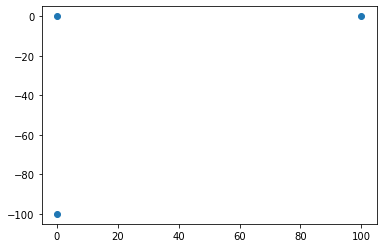

In [54]:
plt.scatter(world_points[:,0], world_points[:,1])

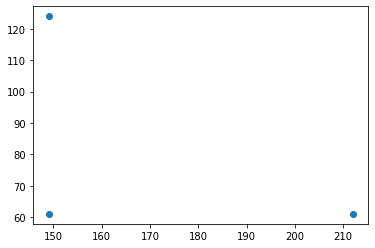

In [55]:
plt.scatter(image_points[:,0], image_points[:,1])